In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))

In [2]:
fdiry = file.path(FD_RES, "data")
fname = "*/target_PER1.bed"
fglob = file.path(fdiry, fname)
Sys.glob(fglob)

[1] "/home/mount/work/out/proj_combeffect/data/Input1_20x/target_PER1.bed"
 [2] "/home/mount/work/out/proj_combeffect/data/Input1/target_PER1.bed"    
 [3] "/home/mount/work/out/proj_combeffect/data/Input2_20x/target_PER1.bed"
 [4] "/home/mount/work/out/proj_combeffect/data/Input2/target_PER1.bed"    
 [5] "/home/mount/work/out/proj_combeffect/data/Input3_20x/target_PER1.bed"
 [6] "/home/mount/work/out/proj_combeffect/data/Input3/target_PER1.bed"    
 [7] "/home/mount/work/out/proj_combeffect/data/Input4_20x/target_PER1.bed"
 [8] "/home/mount/work/out/proj_combeffect/data/Input4/target_PER1.bed"    
 [9] "/home/mount/work/out/proj_combeffect/data/Input5_20x/target_PER1.bed"
[10] "/home/mount/work/out/proj_combeffect/data/Input5/target_PER1.bed"    
[11] "/home/mount/work/out/proj_combeffect/data/Input/target_PER1.bed"     
[12] "/home/mount/work/out/proj_combeffect/data/TFX2_Dex/target_PER1.bed"  
[13] "/home/mount/work/out/proj_combeffect/data/TFX2_DMSO/target_PER1.bed" 
[14] "/home/mount/work/out/proj_combeffect/data/TFX3_Dex/target_PER1.bed"  
[15] "/home/mount/work/out/proj_combeffect/data/TFX3_DMSO/target_PER1.bed" 
[16] "/home/mount/work/out/proj_combeffect/data/TFX4_Dex/target_PER1.bed"  
[17] "/home/mount/work/out/proj_combeffect/data/TFX4_DMSO/target_PER1.bed" 
[18] "/home/mount/work/out/proj_combeffect/data/TFX5_Dex/target_PER1.bed"  
[19] "/home/mount/work/out/proj_combeffect/data/TFX5_DMSO/target_PER1.bed" 
[20] "/home/mount/work/out/proj_combeffect/data/TFX_Dex/target_PER1.bed"   
[21] "/home/mount/work/out/proj_combeffect/data/TFX_DMSO/target_PER1.bed"

In [5]:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End")
fdiry = file.path(FD_RES, "data")
fname = "target_PER1.bed"

sam   = "Input"
fpath = file.path(fdiry, sam, fname)
dat_bed_input = read_tsv(fpath, col_types=ctypes, col_names=cnames)

sam   = "TFX_DMSO"
fpath = file.path(fdiry, sam, fname)
dat_bed_dmso = read_tsv(fpath, col_types=ctypes, col_names=cnames)

sam   = "TFX_Dex"
fpath = file.path(fdiry, sam, fname)
dat_bed_dex = read_tsv(fpath, col_types=ctypes, col_names=cnames)

In [6]:
head(dat_bed_input, 3)

Chrom,Start,End
<chr>,<dbl>,<dbl>
chr17,8148117,8149012
chr17,8148122,8149107
chr17,8148178,8149194


In [7]:
head(dat_bed_dmso, 3)

Chrom,Start,End
<chr>,<dbl>,<dbl>
chr17,8148000,8148888
chr17,8148001,8148888
chr17,8148049,8148884


In [8]:
head(dat_bed_dex, 3)

Chrom,Start,End
<chr>,<dbl>,<dbl>
chr17,8148000,8148888
chr17,8148097,8149186
chr17,8148180,8149106


## fragment length vs location

In [30]:
dat = dat_bed_input
dat = dat %>% mutate(Loc = (Start + End) / 2, Len = End - Start)
gp1 = ggplot(dat, aes(x=Loc, y=Len)) + 
    geom_point(size=0.1) + 
    theme_bw() + 
    labs(x="Location", y="Fragment Length", title="Input")

In [31]:
dat = dat_bed_dmso
dat = dat %>% mutate(Loc = (Start + End) / 2, Len = End - Start)
gp2 = ggplot(dat, aes(x=Loc, y=Len)) + 
    geom_point(size=0.1) + 
    theme_bw() + 
    labs(x="Location", y="Fragment Length", title="Output (DMSO)")

In [32]:
dat = dat_bed_dex
dat = dat %>% mutate(Loc = (Start + End) / 2, Len = End - Start)
gp3 = ggplot(dat, aes(x=Loc, y=Len)) + 
    geom_point(size=0.1) + 
    theme_bw() + 
    labs(x="Location", y="Fragment Length", title="Output (Dex)")

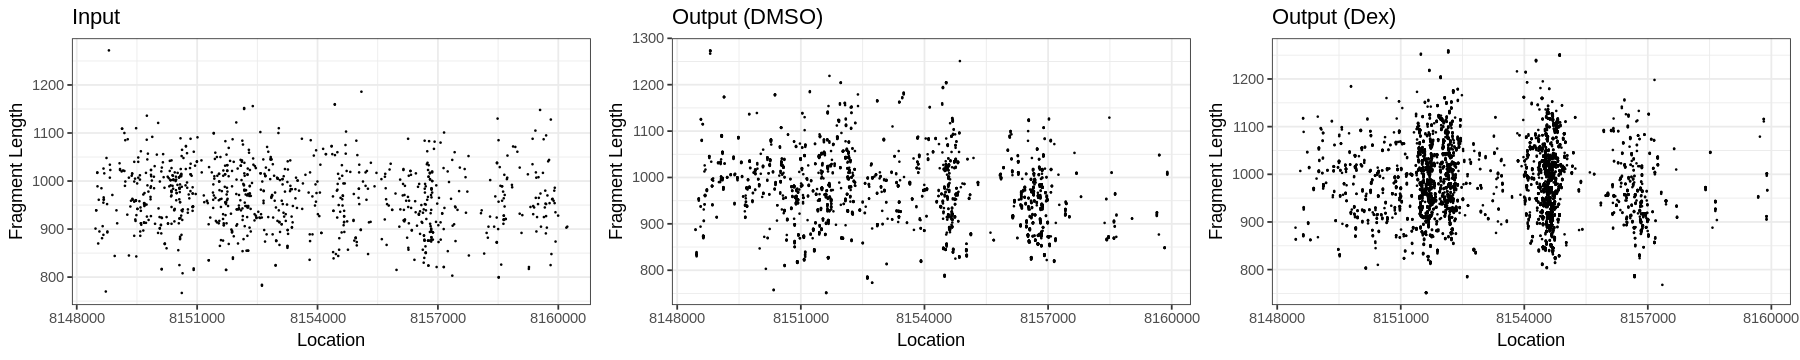

In [33]:
options(repr.plot.height=3, repr.plot.width=15)
grid.arrange(gp1, gp2, gp3, ncol=3)

## Import INPUT

In [2]:
fdiry = file.path(FD_RES, "source")
fname = "*/Input?.bedpe"
fglob = file.path(fdiry, fname)

ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End")
fpaths = Sys.glob(fglob)
print(fpaths)

lst_bed_input = lapply(fpaths, function(fpath){
    sam = str_remove(basename(fpath), ".bedpe")
    grp = str_remove(sam, "[0-9]")
    dat = read_tsv(fpath, col_types=ctypes, col_names=cnames)
    dat = dat %>% mutate(Sample = sam, Group = grp)
    return(dat)
})

[1] "/home/mount/work/out/proj_combeffect/source/Input1/Input1.bedpe"
[2] "/home/mount/work/out/proj_combeffect/source/Input2/Input2.bedpe"
[3] "/home/mount/work/out/proj_combeffect/source/Input3/Input3.bedpe"
[4] "/home/mount/work/out/proj_combeffect/source/Input4/Input4.bedpe"
[5] "/home/mount/work/out/proj_combeffect/source/Input5/Input5.bedpe"


In [3]:
fdiry = file.path(FD_RES, "source")
fname = "*/TFX?_DMSO.bedpe"
fglob = file.path(fdiry, fname)

ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End")
fpaths = Sys.glob(fglob)
print(fpaths)

fpath = fpaths[1]
sam = str_remove(basename(fpath), ".bedpe")
grp = str_remove(sam, "[0-9]")
dat = read_tsv(fpath, col_types=ctypes, col_names=cnames)
dat = dat %>% mutate(Sample = sam, Group = grp)
dat_bed_dmso = dat

[1] "/home/mount/work/out/proj_combeffect/source/TFX2_DMSO/TFX2_DMSO.bedpe"
[2] "/home/mount/work/out/proj_combeffect/source/TFX3_DMSO/TFX3_DMSO.bedpe"
[3] "/home/mount/work/out/proj_combeffect/source/TFX4_DMSO/TFX4_DMSO.bedpe"
[4] "/home/mount/work/out/proj_combeffect/source/TFX5_DMSO/TFX5_DMSO.bedpe"


In [5]:
fdiry = file.path(FD_RES, "source")
fname = "*/TFX?_Dex.bedpe"
fglob = file.path(fdiry, fname)

ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Start", "End")
fpaths = Sys.glob(fglob)
print(fpaths)

fpath = fpaths[1]
sam = str_remove(basename(fpath), ".bedpe")
grp = str_remove(sam, "[0-9]")
dat = read_tsv(fpath, col_types=ctypes, col_names=cnames)
dat = dat %>% mutate(Sample = sam, Group = grp)
dat_bed_dex = dat

[1] "/home/mount/work/out/proj_combeffect/source/TFX2_Dex/TFX2_Dex.bedpe"
[2] "/home/mount/work/out/proj_combeffect/source/TFX3_Dex/TFX3_Dex.bedpe"
[3] "/home/mount/work/out/proj_combeffect/source/TFX4_Dex/TFX4_Dex.bedpe"
[4] "/home/mount/work/out/proj_combeffect/source/TFX5_Dex/TFX5_Dex.bedpe"


In [6]:
dat_input = bind_rows(lst_bed_input) %>% mutate(Length = End - Start)

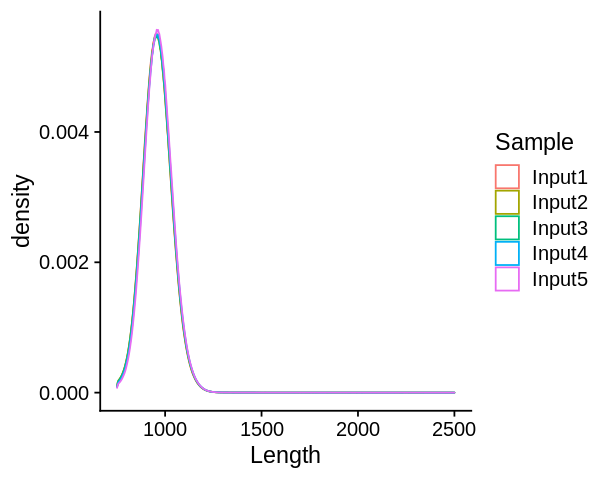

In [9]:
options(repr.plot.height=4, repr.plot.width=5)

dat = dat_input
gpt = ggplot(dat, aes(x=Length, color=Sample)) + 
    geom_density() + 
    theme_cowplot()
print(gpt)

In [11]:
dat_inp   = lst_bed_input[[1]] %>% mutate(Length = End - Start)
dat_dmso  = dat_bed_dmso       %>% mutate(Length = End - Start)
dat_dex   = dat_bed_dex        %>% mutate(Length = End - Start)
dat_total = bind_rows(dat_inp, dat_dmso, dat_dex)

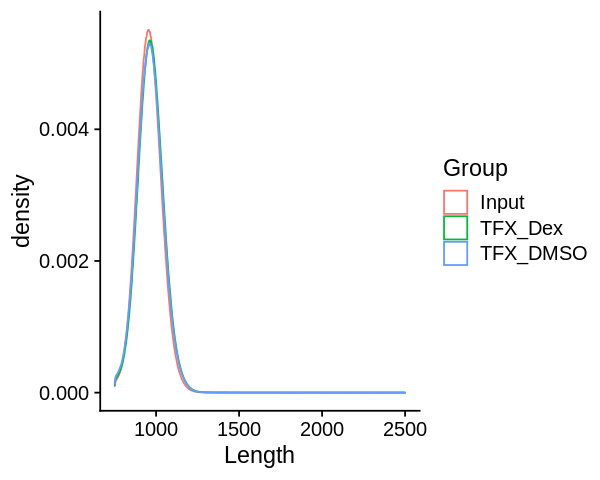

In [12]:
options(repr.plot.height=4, repr.plot.width=5)

dat = dat_total
gpt = ggplot(dat, aes(x=Length, color=Group)) + 
    geom_density() + 
    theme_cowplot()
print(gpt)